# Исследование данных о пользователях и их поездках сервиса аренды самокатов GoFast

Нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках популярного сервиса аренды самокатов GoFast. Требуется проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.

Сервисом можно пользоваться:
- без подписки:
 - абонентская плата отсутствует;
 - стоимость одной минуты поездки — 8 рублей;
 - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra:
 - абонентская плата — 199 рублей в месяц;
 - стоимость одной минуты поездки — 6 рублей;
 - стоимость старта — бесплатно.

Перед бизнесом встали следующие вопросы:
- Тратят ли пользователи с подпиской больше времени на поездки?
- Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров(оптимальное расстояние с точки зрения износа самоката)?
- Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
- Снизится ли значимо количество обращений в техподдержку после обновления серверов?

Так как основная задача любого бизнеса - максимилизация прибыли, можно сказать, что вопрос о сравнении величины помесячной прибыли от пользователей с подпиской и без наиболее значимый.

**Цель исследования:**

1. Проанализировать данные о пользователях сервиса аренды самокатов GoFast и их поездках 
2. Проверить гипотезы, которые могут помочь бизнесу вырасти

**Ход исследования:**

Будут открыты и проанализировны имеющиеся данные, определено качество выборки, наличие дубликатов, ошибок. За тем, произведем расчет дополнительных параметров. Далее последует анализ гипотез и выводы.

Так будут пройдены все этапы анализа данных:

- Обзор данных
- Предобработка данных
- Проведение исследовательского анализа данных
- Расчеты и анализ результатов
- Проверка гипотез
- Написание общего вывода

 
**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.

Данные о пользователх в `users_go.csv`, где


`user_id`	уникальный идентификатор пользователя

`name`	имя пользователя

`age`	возраст

`city`	город

`subscription_type`	тип подписки (free, ultra)

Поездки в `rides_go.csv`, где


`user_id`	уникальный идентификатор пользователя

`distance`	расстояние, которое пользователь проехал в текущей сессии (в метрах)

`duration`	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

`date`	дата совершения поездки

Подписки — `subscriptions_go.csv`, где


`subscription_type`	тип подписки

`minute_price`	стоимость одной минуты поездки по данной подписке

`start_ride_price`	стоимость начала поездки

`subscription_fee`	стоимость ежемесячного платежа


Импортируем необходимые библиотеки

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from math import sqrt, factorial, exp
from scipy.stats import poisson,binom
from scipy import stats as st
from IPython.display import display, Markdown

#### Шаг 1. Загрузка данных

Откроем файлы и выведем исходнык таблицы на экран для изучения.

In [5]:
data_users = pd.read_csv('/Users/fen1x/Documents/Analize_new_proffesion/исх данные/users_go.csv')
data_rides = pd.read_csv('/Users/fen1x/Documents/Analize_new_proffesion/исх данные/rides_go.csv', parse_dates=['date'])
data_subscriptions = pd.read_csv('/Users/fen1x/Documents/Analize_new_proffesion/исх данные/subscriptions_go.csv')
pd.set_option('display.max_columns', 500)

Теперь выведем сводную информацию о таблице **`data_users`** с помощью метода  ***info()*** и саму таблицу

In [6]:
#Функция для вывода информации
def start_info(name,df):
    #применяем стили к таблице
    df1=df.head(10).style.set_properties(**{'background-color': 'white', 'color': 'black'})
    df1=df1.set_table_styles([{
    'selector': 'td',
    'props': [('border', '1px solid black')]},
    {'selector': 'th',
     'props': [('border', '1px solid black')]}])                                      
    print('\n\n',name)
    display(df1)
    print()
    df.info()

start_info('Данные о пользователях',data_users)



 Данные о пользователях


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


По общей информации видно, что пропусков в этой таблице не имеется.

Построим график по столбцу `age` .

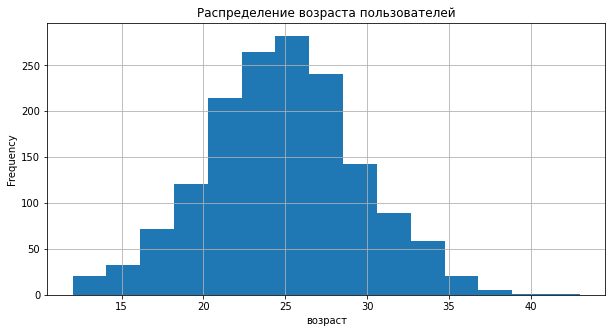

In [7]:
data_users['age'].plot(kind='hist', figsize = (10,5), bins=15, grid=True)
# Добавляем заголовок
plt.title('Распределение возраста пользователей')
# Добавляем подпись оси X
plt.xlabel('возраст')
plt.show()

Гистограмма иллюстрирует, что данные имеют нормальное распределение и нет выбивающихся значений.

Выведем сводную информацию о таблице **`data_rides`** с помощью метода  ***info()*** и саму таблицу

In [8]:
start_info('Данные о поездках',data_rides)



 Данные о поездках


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01 00:00:00
1,1,2617.592153,15.816871,2021-01-18 00:00:00
2,1,754.159807,6.232113,2021-04-20 00:00:00
3,1,2694.783254,18.511000,2021-08-11 00:00:00
4,1,4028.687306,26.265803,2021-08-28 00:00:00
5,1,2770.890808,16.650138,2021-10-09 00:00:00
6,1,3039.020292,14.927879,2021-10-19 00:00:00
7,1,2842.118050,23.117468,2021-11-06 00:00:00
8,1,3412.690668,15.238072,2021-11-14 00:00:00
9,1,748.690645,15.041884,2021-11-22 00:00:00



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


В данных имеется столбец с датой совершения поездки. Посмотрим за сколько лет нам предоставлена информация

In [9]:
data_rides.loc[:,'date'].astype('datetime64[Y]').unique()

array(['2021-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

Информация в данных за 2021 год

Так же мы видим, что, как и в предыдущей таблице, пропусков в этой нет. Однако, целесообразно округлить значения в столбцах `distance` и `duration` до целых, так как данные в них в метрах и минутах соответственно.

Построим график по столбцам `distance` и `duration` .

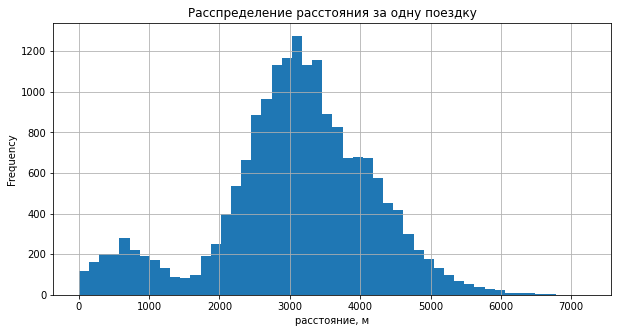

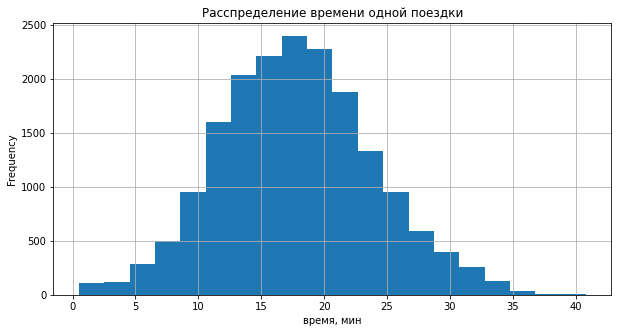

In [10]:
data_rides['distance'].plot(kind='hist', figsize = (10,5), bins=50, grid=True)
# Добавляем заголовок
plt.title('Расспределение расстояния за одну поездку')
# Добавляем подпись оси X
plt.xlabel('расстояние, м')
plt.show()
data_rides['duration'].plot(kind='hist', figsize = (10,5), bins=20, grid=True)
# Добавляем заголовок
plt.title('Расспределение времени одной поездки')
# Добавляем подпись оси X
plt.xlabel('время, мин')
plt.show()

По гистограммам можно сказать, что серьезных аномалий в данных не неблюдается, однако имеет смысл более глубоко изучить данные столбца `distance`(распределение данных нельзя назвать нормальным)

Воспользуемся методом  ***info()*** применительно к таблице **`data_subscriptions`** и выведем саму таблицу

In [11]:
start_info('Данные о подписках',data_subscriptions)



 Данные о подписках


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Данная таблица состоит всего из двух строк и не имеет пропусков, так же столбцы, содержащие числовые данные имеют тип ***int***

Все три таблицы, которые потребуются для анализа, были рассмотрены. В данных не было обнаружено пропусков, однако имеет смысл изменить тип данных в столбцах `distance` и `duration` таблицы **`data_rides`**. Так же, в этой таблице имеет смысл более детально изучить данные в столбце `distance`

Перейдем к предобработке данных

#### Шаг 2. Предобработка данных

##### Изменение типа данных

Изменим тип данных, в столбцах, `distance` и `duration` таблицы **`data_rides`**. Данные в `distance` и `duration` предварительно округлим до целых чисел (метров и минут соответственно)

In [12]:
data_rides['distance'] = round(data_rides['distance'],0).astype('int')
# Время округляем до большего целого числа
data_rides['duration'] = np.ceil(data_rides['duration']).astype('int')

##### Поиск дубликатов

Произведем поиск неявных дубликатов

In [13]:
print("Количество уникальных имен:",data_users['name'].nunique())
data_users = data_users.sort_values('name')
data_users['name'].unique()

Количество уникальных имен: 194


array(['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра',
       'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина',
       'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий',
       'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина',
       'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём',
       'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия',
       'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника',
       'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад',
       'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей',
       'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила',
       'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий',
       'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена',
       'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар',
       'Злата', 

Повторов обнаружено не было

In [14]:
print("Количество уникальных названий городов:",data_users['city'].nunique())
data_users['city'].unique()

Количество уникальных названий городов: 8


array(['Екатеринбург', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Тюмень',
       'Сочи', 'Москва', 'Пятигорск'], dtype=object)

In [15]:
print("Количество уникальных названий:",data_users['subscription_type'].nunique())
data_users['subscription_type'].unique()

Количество уникальных названий: 2


array(['ultra', 'free'], dtype=object)

Неявных дубликатов обнаружено не было

Проверим наличие явных дубликатов

In [16]:
print("Количество явных дубликатов в data_users:", data_users.duplicated().sum())
print("Количество явных дубликатов в data_rides:", data_rides.duplicated().sum())
print("Количество явных дубликатов в data_subscriptions:", data_subscriptions.duplicated().sum())

Количество явных дубликатов в data_users: 31
Количество явных дубликатов в data_rides: 0
Количество явных дубликатов в data_subscriptions: 0


Избавимся от явных дубликатов

In [17]:
data_users = data_users.drop_duplicates()

In [18]:
print("Количество явных дубликатов в data_users:", data_users.duplicated().sum())

Количество явных дубликатов в data_users: 0


##### Проверка данных на аномальные и выбивающиеся значения.


На этапе знакомства с таблицами данных, было принято решение более детально рассмотреть столбец `distance` таблицы **`data_rides`** 

Еще раз построим график

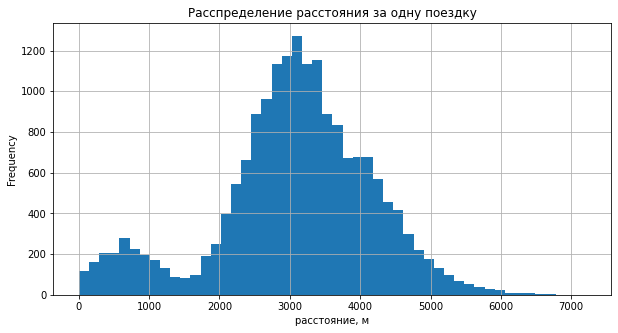

In [19]:
data_rides['distance'].plot(kind='hist', figsize = (10,5), bins=50, grid=True)
# Добавляем заголовок
plt.title('Расспределение расстояния за одну поездку')
# Добавляем подпись оси X
plt.xlabel('расстояние, м')
plt.show()

Помотрим статистическую сводку столбца `distance`

In [20]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659010
std       1116.832209
min          1.000000
25%       2543.000000
50%       3134.000000
75%       3776.000000
max       7211.000000
Name: distance, dtype: float64

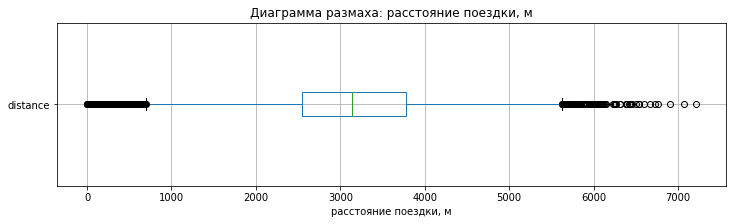

In [21]:
def box(dt,col,name):
    dt.boxplot(column=col,vert=False, figsize = (12,3))
    # Добавляем заголовок
    plt.title('Диаграмма размаха: ' + name)
    # Добавляем подпись оси X
    plt.xlabel(name)
    plt.show()

box(data_rides,'distance','расстояние поездки, м')

Построим аналогичную диаграмму по срезу данных, в которые будет входить дистанция, ограниченная **"верхним усом"** , то есть суммы величины третьего квартиля ***(Q3)*** и умноженной на 1,5 межквартильным размахом ***(Q3-Q1)*** то есть ***Q3+1.5x(Q3-Q1)***, и **"нижним усом"** -  ***Q1- 1.5x(Q3-Q1)***

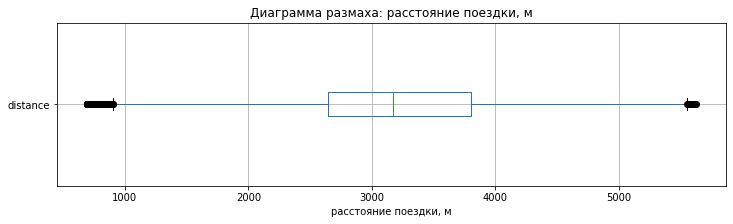

In [22]:
us_top = data_rides['distance'].describe()['75%']+ \
    (1.5*(data_rides['distance'].describe()['75%'] - data_rides['distance'].describe()['25%']))

us_lower = data_rides['distance'].describe()['25%']- \
    (1.5*(data_rides['distance'].describe()['75%'] - data_rides['distance'].describe()['25%']))

data_rides_new = data_rides.query('(distance<= @us_top) & (distance>=@us_lower)')


box(data_rides_new,'distance','расстояние поездки, м')

Теперь диаграмма стала более наглядной. Проверим сколько строк было "откинуто" и посмотрим, как изменились статистические значения. 

In [23]:
print("Новый набор данных меньше на ", \
      data_rides['distance'].count() - data_rides_new['distance'].count(),\
      " строк,(", \
      round(((data_rides['distance'].count() - data_rides_new['distance'].count())/
       data_rides['distance'].count())*100,0),"%)") \

data_rides_new['distance'].describe().round(0)

Новый набор данных меньше на  1036  строк,( 6.0 %)


count    17032.0
mean      3192.0
std        929.0
min        694.0
25%       2644.0
50%       3174.0
75%       3806.0
max       5623.0
Name: distance, dtype: float64

Нам нужно откинуть всего 6% строк, однако от проеханного расстояния расчет выручки компании не зависит, на сбой при сборе информации это не похоже(выбросы не являются критичными и подозрительно аномальными). 

Возможно пользователи берут самокаты, чтобы доехать от дома до остановки или на похожие нужды, то есть используют не как основное, а как дополнительное средство передвижения. Поэтому гистограмма отражает пик части таких пользователей на расстоянии поездки равным приблизительно 500м

Принимаем решение оставить данные без изменений.

##### Добавление дополнительных столбцов

В анализе нам потребуется месяц совершения поездки. Добавим в таблицу новый столбец `month`, на основе имеющихся данных в столбце `date`.

In [24]:
data_rides.loc[:,'month'] =  data_rides.loc[:,'date'].astype('datetime64[M]')
data_rides

,user_id,distance,duration,date,month
0,1,4410,26,2021-01-01,2021-01-01
1,1,2618,16,2021-01-18,2021-01-01
2,1,754,7,2021-04-20,2021-04-01
3,1,2695,19,2021-08-11,2021-08-01
4,1,4029,27,2021-08-28,2021-08-01
...,...,...,...,...,...
18063,1534,3781,20,2021-11-04,2021-11-01
18064,1534,2840,22,2021-11-16,2021-11-01
18065,1534,3826,19,2021-11-18,2021-11-01
18066,1534,2902,17,2021-11-27,2021-11-01


В данном разделе были изменены типы данных в некоторых столбцах; таблицы были проверены на пропуски; удалены дублирующиеся строки, так же была произведена проверна на наличие неявных дубликатов. Завершающим этапом был добавлен требуемый для дальнейшего анализа столбец.

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

Город 		 Кол-во

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


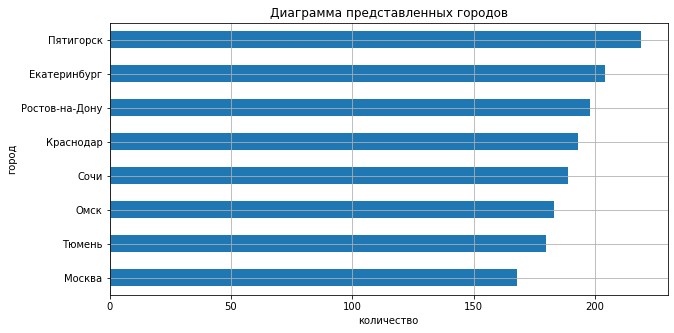

In [25]:
data_users.groupby('city')['city'].count().sort_values().plot(kind='barh', figsize = (10,5), grid=True)
# Добавляем заголовок
plt.title('Диаграмма представленных городов')
# Добавляем подпись оси X и Y
plt.xlabel('количество')
plt.ylabel('город')
# Поворачиваем метки на оси X на 90 градусов для вертикального отображения
#plt.xticks(rotation=90)
print('Город \t\t Кол-во\n')
print(data_users['city'].value_counts())

In [26]:
town = round((((data_users['city'].value_counts()['Пятигорск'])-(data_users['city'].value_counts()['Москва']))/
              (data_users['city'].value_counts()['Пятигорск']))*100,0).astype('int')

display(Markdown(
f"Мы видим, что максимальное количество пользователей сервиса аренды самокатов GoFast находится в Пятигорске \
({data_users['city'].value_counts()['Пятигорск']} человек). Минимальное - в Москве\
({data_users['city'].value_counts()['Москва']}человек). \
Разница между ними - {town} %. Возможно, сеть начала свое развитие с менее крупных городов.\
 Так же в Москве может быть больше конкуренции."))

Мы видим, что максимальное количество пользователей сервиса аренды самокатов GoFast находится в Пятигорске (219 человек). Минимальное - в Москве(168человек). Разница между ними - 23 %. Возможно, сеть начала свое развитие с менее крупных городов. Так же в Москве может быть больше конкуренции.

##### Cоотношение пользователей с подпиской и без подписки

Посмотрим сколько пользователей с подпиской и сколько без

,user_id,% от Всего
subscription_type,,
free,835,54
ultra,699,46
Всего,1534,100


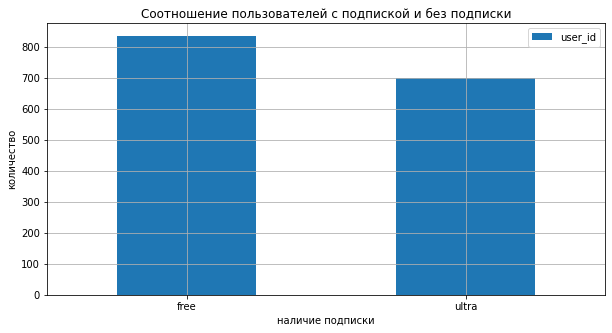

In [27]:
# Создадим сводную таблицу   
df = data_users.pivot_table(index= 'subscription_type', 
                            values='user_id', 
                            aggfunc='count')
# Добавление строки с общей суммой
df.loc['Всего'] = df['user_id'].sum()
# Добавление столбца с процентами
df['% от Всего'] = round((df['user_id'] / df.loc['Всего', 'user_id']) * 100,0).astype('int')
df1=df
#Удалим строку Всего, чтобы построить график
df1 = df1.drop('Всего')
df1.plot(kind='bar',y='user_id', figsize = (10,5), grid=True)
# Добавляем заголовок
plt.title('Cоотношение пользователей с подпиской и без подписки')
# Добавляем подпись оси X и Y
plt.xlabel('наличие подписки')
plt.ylabel('количество')
plt.xticks(rotation=0)
df

Мы видим, что почти половина пользователей сервиса GoFast  имеют подписку (46%).

##### Возраст пользователей

Теперь посмотрим какого возраста пользователи сервиса

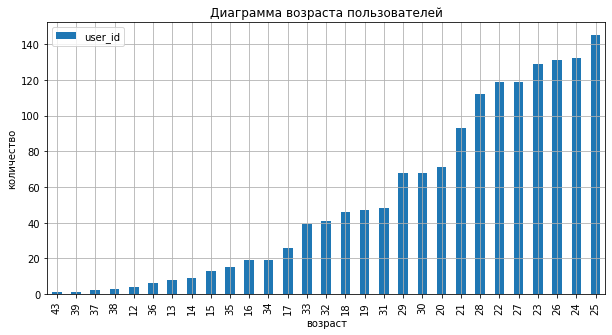

In [28]:
# Создадим сводную таблицу   
df1 = data_users.pivot_table(index= 'age', 
                            values='user_id', 
                            aggfunc='count')


df1.sort_values('user_id').plot(kind='bar', figsize = (10,5), grid=True)
# Добавляем заголовок
plt.title('Диаграмма возраста пользователей')
# Добавляем подпись оси X и Y
plt.xlabel('возраст')
plt.ylabel('количество')

plt.show()

Сервисом аренды самокатов пользуются подростки и взрослые, то есть люди, начиная от 12 и до 43 лет. При этом среди пользователей чаще встречаются люди среднего возраста(23-26лет).

In [29]:
print("Количество пользователей возрастом от 23 до 26 лет составляют",round(((df1.loc[23, 'user_id'] + 
             df1.loc[24, 'user_id']+ 
             df1.loc[25, 'user_id']+ 
             df1.loc[26, 'user_id'])/df1['user_id'].sum()*100),0).astype('int'), "% от общего числа пользователей")

print("При этом подростков возрастом от 13 до 15 лет всего ",round(((df1.loc[12, 'user_id'] + 
             df1.loc[13, 'user_id']+ 
             df1.loc[14, 'user_id']+ 
             df1.loc[15, 'user_id'])/df1['user_id'].sum()*100),0).astype('int'), "% от общего числа пользователей")

Количество пользователей возрастом от 23 до 26 лет составляют 35 % от общего числа пользователей
При этом подростков возрастом от 13 до 15 лет всего  2 % от общего числа пользователей


Теперь взглянем на гистограмму

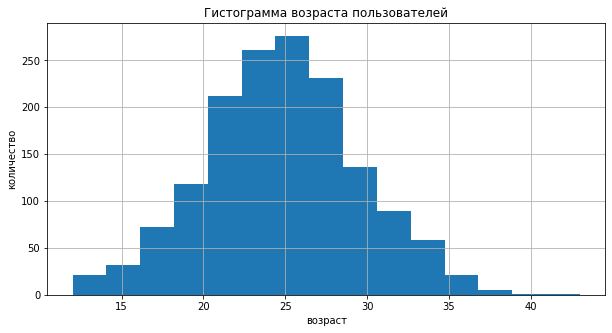

In [30]:
data_users['age'].plot(kind='hist', figsize = (10,5), grid=True, bins=15)
# Добавляем заголовок
plt.title('Гистограмма возраста пользователей')
# Добавляем подпись оси X и Y
plt.xlabel('возраст')
plt.ylabel('количество')
plt.show()

По гистограмме мы видим аналогичные результаты - пользователи, возрастом 23 до 26 преобладают над остальными.

Построим диаграмму размаха.

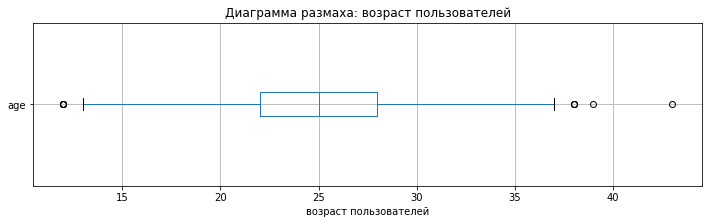

count    1534.0
mean       25.0
std         5.0
min        12.0
25%        22.0
50%        25.0
75%        28.0
max        43.0
Name: age, dtype: float64

In [31]:
box(data_users,'age','возраст пользователей')
data_users['age'].describe().round(0)

Диаграмма размаха иллюстрирует, что пользователи в среднем имеют возраст от 22 до 28 лет, что не противоречит указанным выше выводам. Так же мы видим, что имеется несколько пользователей старше приблизительно 37 лет, что скорее всего не является искажением данных.

##### Расстояние, которое пользователь преодолел за одну поездку

Для анализа расстояния, которое пользователь преодалевает за одну поездку, построим гистограмму

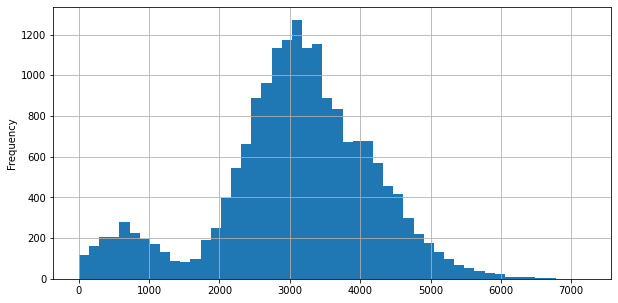

Минимальное расстояние, которое проезжает пользователь за одну поездку, среди имеющихся данных - 1м, максимальное - 7211м. 

 В среднем пользователи проезжают 3134м. 

 Как упоминалось выше, возможно пользователи берут самокаты, чтобы доехать от дома до остановки или на похожие нужды, то есть используют не как основное, а как дополнительное средство передвижения. Поэтому гистограмма отражает пик части таких пользователей на расстоянии поездки равным приблизительно 500м.

In [32]:
data_rides.sort_values('distance')['distance'].plot(kind='hist', figsize = (10,5), bins=50, grid=True)
plt.show()

display(Markdown(
f"Минимальное расстояние, которое проезжает пользователь за одну поездку, среди имеющихся данных \
- {data_rides['distance'].describe()['min'].astype('int')}м, \
максимальное - {data_rides['distance'].describe()['max'].astype('int')}м. \n\n \
В среднем пользователи проезжают {data_rides['distance'].median().astype('int')}м. \n\n \
Как упоминалось выше, возможно пользователи берут самокаты, чтобы доехать от дома до остановки или на \
похожие нужды, то есть используют не как основное, а как дополнительное средство передвижения. \
Поэтому гистограмма отражает пик части таких пользователей на расстоянии поездки равным приблизительно 500м."))


##### Продолжительность поездок

Продолжительность поездок в минутах имеется в столбце `duration`.

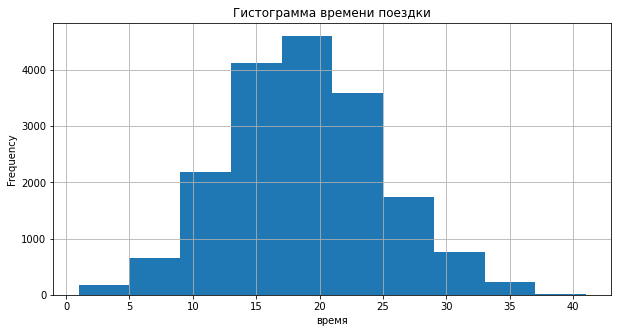

Гистограмма показывает, что средняя продолжительность поездок -  около 20 минут. Посмотрим, за какое именно время чаще всего совершаются поездки. Для этого построим столбчатую диаграмму.

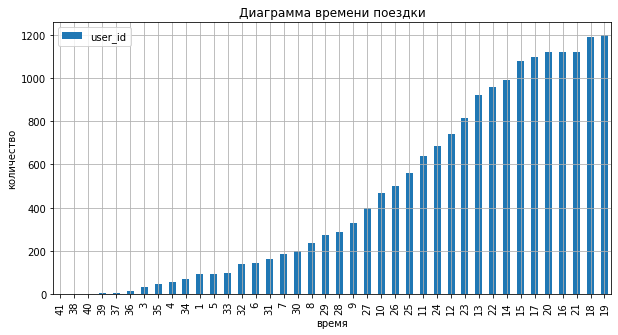

Столбчатая диаграмма иллюстрирует, что чаще всего поездки длятся от 16 до 21 мин, что составляет 38% от общего числа поездок. Так же мы видим, что имеются единичные поездки, которые составляют более 36 минут. 

 Построим диаграмму размаха.

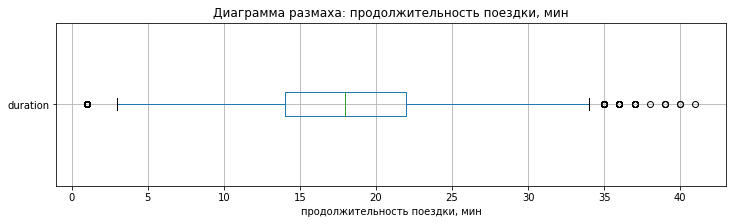

count    18068.0
mean        18.0
std          6.0
min          1.0
25%         14.0
50%         18.0
75%         22.0
max         41.0
Name: duration, dtype: float64

In [33]:
# Строим гистограмму
data_rides.sort_values('duration')['duration'].plot(kind='hist', figsize = (10,5), bins=10, grid=True)
# Добавляем заголовок
plt.title('Гистограмма времени поездки')
# Добавляем подпись оси X и Y
plt.xlabel('время')
plt.show()

display(Markdown(
f"Гистограмма показывает, что средняя продолжительность поездок -  около 20 минут. \
Посмотрим, за какое именно время чаще всего совершаются поездки. Для этого построим столбчатую диаграмму."))


# Создадим сводную таблицу   
df2 = data_rides.pivot_table(index= 'duration', 
                            values='user_id', 
                            aggfunc='count')

# Создадим столбчатую диаграмму
df2.sort_values('user_id').plot(kind='bar', figsize = (10,5), grid=True)
# Добавляем заголовок
plt.title('Диаграмма времени поездки')
# Добавляем подпись оси X и Y
plt.xlabel('время')
plt.ylabel('количество')
plt.show()

time = round(((df2.loc[16, 'user_id']+ \
     df2.loc[17, 'user_id']+ df2.loc[18, 'user_id'] + df2.loc[19, 'user_id'] + \
     df2.loc[20, 'user_id']+ df2.loc[21, 'user_id'])/df2['user_id'].sum()*100),0).astype('int')

display(Markdown(
f"Столбчатая диаграмма иллюстрирует, что чаще всего поездки длятся от 16 до 21 мин, \
что составляет {time}% от общего числа поездок. Так же мы видим, что имеются единичные поездки, которые \
составляют более 36 минут. \n\n Построим диаграмму размаха."))

box(data_rides,'duration','продолжительность поездки, мин')
data_rides['duration'].describe().round(0)

Диаграмма показывает, что основной разброс данных находится между 14 и 22 минутами. Вбросы - от 35 мин.  Возможно, пользователи действительно совершали такие длительные поездки, однако, могли возникнуть проблемы с завершением аренды на техническом уровне или проблемы с местом для парковки самоката. 

Диаграммы размаха показывают, что данные содержат небольшое(кроме расстояния поездки) количество выбросов.

***В этом разделе были проанализированы:***
- Частота встречаемости городов
- Cоотношение пользователей с подпиской и без подписки
- Возраст пользователей
- Расстояние, которое пользователь преодолел за одну поездку
- Продолжительность поездок

Так были сделаны следующие выводы:

Максимальное количество пользователей сервиса аренды самокатов GoFast находится в Пятигорске(219 человек). Минимальное - в Москве.

Было определено, что почти половина пользователей сервиса GoFast имеют подписку (46%)

Количество пользователей возрастом от 23 до 26 лет составляют 35 % от общего числа пользователей

В среднем пользователи проезжают 3174м

Чаще всего поездки длятся от 16 до 20 минут, что составляет 33 % от общего числа поездок

Во всех случиях диаграммы размаха показали, что данные содержат небольшое(кроме расстояния поездок) количество выбросов, которые могут быть обоснованы. 

В случае длительных поездок- пользователи могли действительно совершать такие длительные поездки, однако, могли возникнуть проблемы с завершением аренды на техническом уровне или проблемы с местом для парковки самоката, на что следует обратить внимание руководству компании.

Что касается расстояния, которое пользователь преодолевает за одну поездку - есть вероятность, что часть пользователей берет самокаты, чтобы проехать небольшие расстояния. Поэтому соответствующая гистограмма отражает небольшим пиком часть таких пользователей приблизительно на 500м

Так же можно подчеркнуть, что стоит задуматься об ограничении минимального возраста пользователей, так как электросамокат развивает ощутимую скорость и юный водитель может оказаться виновником ДТП. При этом стоит учесть, что в полученных данных подростки до 15 лет составляют всего 2% от общего числа пользователей, то есть не являются основными потребителями услуги аренды.

#### Шаг 4. Объединение данных

##### Объединение данных о пользователях, поездках и подписках

Для упрощения дальнейшего анализа, объединим имеющиеся данные в одну таблицу.

In [34]:
#Используем метод merge()
data_full = data_rides.merge(data_users,
                             on='user_id',
                             how='left') \
            .merge(data_subscriptions,
                   on='subscription_type',
                   how='left')

display(Markdown(
f"Проверим как объединились данные и выведем получившуюся таблицу на экран."))

data_full

Проверим как объединились данные и выведем получившуюся таблицу на экран.

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4410,26,2021-01-01,2021-01-01,Кира,22,Тюмень,ultra,6,0,199
1,1,2618,16,2021-01-18,2021-01-01,Кира,22,Тюмень,ultra,6,0,199
2,1,754,7,2021-04-20,2021-04-01,Кира,22,Тюмень,ultra,6,0,199
3,1,2695,19,2021-08-11,2021-08-01,Кира,22,Тюмень,ultra,6,0,199
4,1,4029,27,2021-08-28,2021-08-01,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781,20,2021-11-04,2021-11-01,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840,22,2021-11-16,2021-11-01,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826,19,2021-11-18,2021-11-01,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902,17,2021-11-27,2021-11-01,Альберт,25,Краснодар,free,8,50,0


In [35]:
display(Markdown(
f"Посмотрим общую информацию о получившейся таблице."))

data_full.info()

display(Markdown(
f"В первоначальной таблице было 18068 строк как и в текущей. Можем сделать вывод, что все на месте."))

Посмотрим общую информацию о получившейся таблице.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  int64         
 2   duration           18068 non-null  int64         
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  datetime64[ns]
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 1.8+ MB


В первоначальной таблице было 18068 строк как и в текущей. Можем сделать вывод, что все на месте.

##### Создание новых таблиц

Создадим 2 новых таблицы:

- c данными о пользователях без подписки
- с данными о пользователях с подпиской

In [36]:
#Создадим срез по столбцу 'subscription_type' c данными о пользователях без подписки
data_full_free = data_full.query('subscription_type == "free"')
#Создадим срез по столбцу 'subscription_type' c данными о пользователях с подпиской
data_full_ultra = data_full.query('subscription_type == "ultra"')

data_full_free.info()
print()
data_full_ultra.info()

display(Markdown(
f"Так как в общей таблице 18068 строк, в `data_full_free` - 11568 строк, а в `data_full_ultra` - 6500 строк,\
можем сделать вывод, что данные разделены на 2 таблицы корректно. Столбцов одинаковое количество. \n\n Следует \
отметить, что по ранее расчитанным данным пользователей с подпиской - 46% от общего числа, \
а строк в таблице с поездками таких людей почти в 2 раза меньше. Очевидно, пользователи с подпиской \
совершают меньше поездок почти в 2 раза."))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   distance           11568 non-null  int64         
 2   duration           11568 non-null  int64         
 3   date               11568 non-null  datetime64[ns]
 4   month              11568 non-null  datetime64[ns]
 5   name               11568 non-null  object        
 6   age                11568 non-null  int64         
 7   city               11568 non-null  object        
 8   subscription_type  11568 non-null  object        
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 1.1+ MB

<class 'pandas.core.frame.DataFrame'>
Int64Index

Так как в общей таблице 18068 строк, в `data_full_free` - 11568 строк, а в `data_full_ultra` - 6500 строк,можем сделать вывод, что данные разделены на 2 таблицы корректно. Столбцов одинаковое количество. 

 Следует отметить, что по ранее расчитанным данным пользователей с подпиской - 46% от общего числа, а строк в таблице с поездками таких людей почти в 2 раза меньше. Очевидно, пользователи с подпиской совершают меньше поездок почти в 2 раза.

##### Визуализация информации о расстоянии и времени поездок пользователей с подпиской и без

Посмотрим зависит ли от подписки пользователей на сервис GoFast расстояние и время поездок.

Построим столбчатую диаграмму по данным о продолжительности поездок.

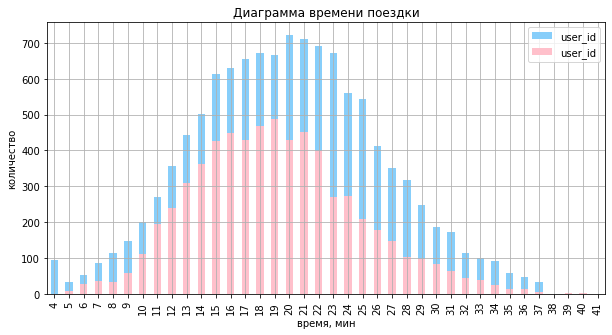

По графику видно, что поездок у пользователей без подписки больше, чем с подпиской - 11568 и 6500 соответственно.

 Максимальное и среднее время поездки так же отличаются: 

 - без подписки - 35 мин и 18 мин соответственно

 - с подпиской - 41 мин и 19 мин соответственно

Теперь посмотрим распределение данных по гистограмме.

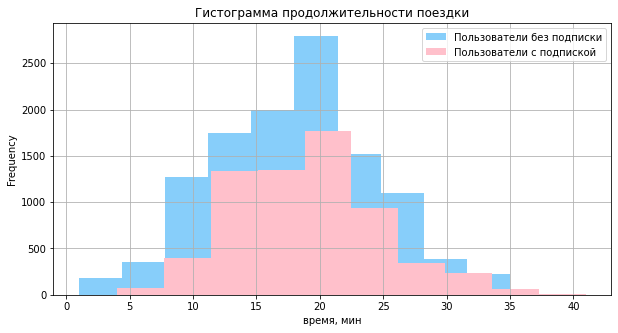

In [37]:
# Создадим функцию для диаграммы
def bar_subscription(ind,x):
    # Создаем объект оси
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Создадим столбчатую диаграмму по таблице data_full_free
    dt_free = data_full_free.pivot_table(index=ind,
                           values='user_id',
                           aggfunc='count') 
    
    dt_free.columns = ['user_id']
    
    dt_free.plot(kind='bar',
      ax=ax,
      color='lightskyblue',
      label='Free',
      grid=True)

    
    # Создадим столбчатую диаграмму по таблице data_full_ultra
    dt_ultra = data_full_ultra.pivot_table(index=ind,
                            values='user_id',
                            aggfunc='count') 
    dt_ultra.columns = ['user_id']
    dt_ultra.plot(kind='bar',
      ax=ax,
      color='pink',
      label='Ultra',
      grid=True)
    
    # Добавляем заголовок
    plt.title('Диаграмма времени поездки')
    # Добавляем подпись оси X и Y
    plt.xlabel(x)
    plt.ylabel('количество')
    ax.legend()
    plt.show()
    return dt_free, dt_ultra

# Создадим функцию для гистограммы
def hist_t_d(dt1,dt2,col,name,x,bins):
    # Создаем объект оси
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Создадим столбчатую диаграмму по таблице data_full_free
    dt1[col].plot(kind='hist',
                      x=col,
                      ax=ax,
                      color='lightskyblue',
                      label='Пользователи без подписки',
                      grid=True,
                      bins=bins)
    # Создадим столбчатую диаграмму по таблице data_full_ultra
    dt2[col].plot(kind='hist',
                  x='distance',
                  ax=ax,
                  color='pink',
                  label='Пользователи с подпиской',
                  grid=True,
                  bins=bins)
    # Добавляем заголовок
    plt.title('Гистограмма ' + name)
    # Добавляем подпись оси X и Y
    plt.xlabel(x)
    ax.legend()
    plt.show()

display(Markdown(
f"Построим столбчатую диаграмму по данным о продолжительности поездок."))

dt_free_dur, dt_ultra_dur = bar_subscription('duration','время, мин')

# Выводы по диограмме
display(Markdown(
f"По графику видно, что поездок у пользователей без подписки больше, чем с подпиской - \
{dt_free_dur['user_id'].sum()} и \
{dt_ultra_dur['user_id'].sum()} соответственно.\n\n \
Максимальное и среднее время поездки так же отличаются: \n\n \
- без подписки - {data_full_free['duration'].max()} мин и \
{round(data_full_free['duration'].mean(),0).astype('int')} мин соответственно\n\n \
- с подпиской - {data_full_ultra['duration'].max()} мин и \
{round(data_full_ultra['duration'].mean(),0).astype('int')} мин соответственно"))

display(Markdown(
f"Теперь посмотрим распределение данных по гистограмме."))

hist_t_d(data_full_free,data_full_ultra,'duration','продолжительности поездки','время, мин',10)


Различия значительны в количестве человек имеющих и не имеющих подписку, продолжительность поездки в обоих случаях отличаются не сильно. Можно отметить, что среди пользователей ресурсом без подписки сильно выделяются поездки продолжительностью около 20 мин. Среди людей, имеющих подписку, пик так же находится около 20 мин, но количество пользователей не так сильно выделяется.

Теперь посмотрим зависит ли от наличия или отсутствия подписки на сервис GoFast расстояние поездок.

Построим гистограмму по данным о расстоянии поездок.

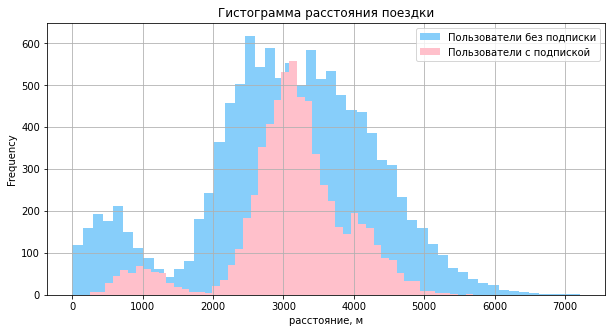

По данным пользователей без подписки

 count    11568.0
mean      3045.0
std       1246.0
min          1.0
25%       2367.0
50%       3115.0
75%       3906.0
max       7211.0
Name: distance, dtype: float64 

 По данным пользователей c подпиской

 count    6500.0
mean     3115.0
std       837.0
min       244.0
25%      2785.0
50%      3149.0
75%      3561.0
max      5700.0
Name: distance, dtype: float64


Среднее расстояние поездки пользователей без подписки - 3045 м, пользователей с подпиской - 3115 м. Mедианы - 3115 м и 3149 м пользователей с подпиской и без соответственно. Однако, разброс пиковых значений у пользователей с подпиской меньше. Возможно это связано с тем, что люди с подпиской совершают меньше поездок.

In [38]:
display(Markdown(
f"Построим гистограмму по данным о расстоянии поездок."))

hist_t_d(data_full_free,data_full_ultra,'distance','расстояния поездки','расстояние, м',50)

print("По данным пользователей без подписки\n\n",
      data_full_free['distance'].describe().round(0),'\n\n',
      "По данным пользователей c подпиской\n\n",
      data_full_ultra['distance'].describe().round(0))

display(Markdown(
f"Среднее расстояние поездки пользователей без подписки - \
{data_full_free['distance'].describe().round(0)['mean'].astype('int')} м, \
пользователей с подпиской - {data_full_ultra['distance'].describe().round(0)['mean'].astype('int')} м. \
Mедианы - {data_full_free['distance'].median().astype('int')} м и \
{data_full_ultra['distance'].median().astype('int')} м пользователей с подпиской и без соответственно.\
 Однако, разброс пиковых значений у пользователей с подпиской меньше. Возможно это связано с тем, что \
люди с подпиской совершают меньше поездок."))

В данном разделе было произведено объединение всех таблиц с данными, создание и анализ таблиц с пользователями имеющими подписку и без нее, так же определено среднее время и среднее расстояние поездок пользователей с подпиской  и без.

Различия значительны только в количестве человек имеющих и не имеющих подписку, продолжительность поездки в обоих случаях отличается не сильно, как и среднее расстояние поездок.

При этом можно отметить, что люди, имеющие подписку, в большинстве проезжают либо около 1000м(маленький пик гистограммы), либо 3100м(большой пик гистограммы). 

Среди пользователей без подписки нет такой четкой градации. На гистограмме видно, что среди них так же имеется небольшое число пользователей, предпочитающих поездки на малые расстояния и здесь они проезжают 500м, а большинство от 2500 до 3600 метров. То есть разброс значительно больше, чем у пользователей с подпиской. 

#### Шаг 5. Подсчёт выручки

##### Расчет общих показателей для каждого из пользователей

Для того, чтобы произвести расчет выручки сервиса GoFast, потребуется определить агрегированные данные о поездках для каждого пользователя. Для этого построим сводную таблицу.

In [39]:
data_full_pivot = data_full.pivot_table(index=['user_id','month'],
                            values=['distance','duration'],
                            aggfunc=['sum','count'])
data_full_pivot.columns = ['distance','duration','count','count2']
data_full_pivot = data_full_pivot.drop('count2', axis=1)

display(Markdown(
f"Посмотрим информацию о получившейся таблице."))

data_full_pivot.info()

display(Markdown(
f"Пропусков нет."))
data_full_pivot

Посмотрим информацию о получившейся таблице.

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, Timestamp('2021-01-01 00:00:00')) to (1534, Timestamp('2021-12-01 00:00:00'))
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   distance  11331 non-null  int64
 1   duration  11331 non-null  int64
 2   count     11331 non-null  int64
dtypes: int64(3)
memory usage: 311.0 KB


Пропусков нет.

distance  duration  count
user_id month                                
1       2021-01-01      7028        42      2
        2021-04-01       754         7      1
        2021-08-01      6724        46      2
        2021-10-01      5810        32      2
        2021-11-01      7004        56      3
...                      ...       ...    ...
1534    2021-06-01      3409        26      2
        2021-08-01      7623        48      2
        2021-09-01      4928        23      1
        2021-11-01     13349        78      4
        2021-12-01      2372        16      1

[11331 rows x 3 columns]

##### Расчет помесячной выручки.

С помощью сводной таблицы и информации об условиях оплаты для подписчиков и тех, у кого нет подписки рассчитаем помесячную выручку сервиса GoFast.

In [40]:
data_full_pivot = data_full.pivot_table(index=['subscription_type','user_id','month'],
                            values=['distance','duration','start_ride_price','subscription_fee','minute_price'],
                            aggfunc=['sum','count','mean']
                                       )
data_full_pivot.columns = \
['distance','duration','sum1','sum2','sum3',
 'count','count1','count2','count3','count4',
 'mean1','mean2','minute_price','start_ride_price','subscription_fee']

data_full_pivot = data_full_pivot.drop(['sum1','sum2','sum3',
                                        'count1','count2','count3','count4',
                                        'mean1','mean2'], axis=1)

def income1(df,start,count,subs_f,minut,duration):
    df['income']=df[start]*df[count]+df[subs_f]+df[minut]*df[duration]
    return df['income']

data_full_pivot['income'] =income1(data_full_pivot,
                                   'start_ride_price',
                                   'count',
                                   'subscription_fee',
                                   'minute_price',
                                   'duration')

data_full_pivot_free=data_full_pivot.query('subscription_type == "free"')['income']
data_full_pivot_ultra=data_full_pivot.query('subscription_type == "ultra"')['income']

data_full_pivot

distance  duration  count  minute_price  \
subscription_type user_id month                                                 
free              700     2021-01-01      2516        15      1             8   
                          2021-02-01     13446        89      5             8   
                          2021-03-01      3798        19      1             8   
                          2021-04-01      2985        16      1             8   
                          2021-06-01      5928        29      2             8   
...                                        ...       ...    ...           ...   
ultra             699     2021-06-01      4073        17      1             6   
                          2021-08-01      7018        45      2             6   
                          2021-09-01      6365        31      2             6   
                          2021-10-01      4708        16      1             6   
                          2021-12-01      3203        26      1             6   

                                      start_ride_price  subscription_fee  \
subscription_type user_id month                                            
free              700     2021-01-01                50                 0   
                          2021-02-01                50                 0   
                          2021-03-01                50                 0   
                          2021-04-01                50                 0   
                          2021-06-01                50                 0   
...                                                ...               ...   
ultra             699     2021-06-01                 0               199   
                          2021-08-01                 0               199   
                          2021-09-01                 0               199   
                          2021-10-01                 0               199   
                          2021-12-01                 0               199   

                                      income  
subscription_type user_id month               
free              700     2021-01-01     170  
                          2021-02-01     962  
                          2021-03-01     202  
                          2021-04-01     178  
                          2021-06-01     332  
...                                      ...  
ultra             699     2021-06-01     301  
                          2021-08-01     469  
                          2021-09-01     385  
                          2021-10-01     295  
                          2021-12-01     355  

[11331 rows x 7 columns]

In [41]:
display(Markdown(
f"С учетом имеющихся условий оплаты поездок была рассчитана общая выручка в размере \
{data_full_pivot['income'].sum()} руб. При этом выручка от пользователей без подписки составила \
{data_full_pivot_free.sum()} руб., а от пользователей с подпиской - {data_full_pivot_ultra.sum()} руб."))

С учетом имеющихся условий оплаты поездок была рассчитана общая выручка в размере 3878641 руб. При этом выручка от пользователей без подписки составила 2234104 руб., а от пользователей с подпиской - 1644537 руб.

#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки?

Проверим следующие гипотезы:
- Нулевая гипотеза (Н0): Среднее время поездки у пользователей с подпиской и без подписки одинаковое
- Альтернативная гипотеза (Н1): Среднее время поездки у пользователей с подпиской больше чем у пользователей без подписки

In [42]:
#Создадим Series с данными о времени поездки 
sample_ultra_duration = data_full_ultra['duration'] 
sample_free_duration = data_full_free['duration']

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(sample_ultra_duration, sample_free_duration, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве времени поездки')
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве времени поездки')

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу о равенстве времени поездки


Так как p-значение: 2.4959453720736625e-34 (2.4959453720736625× 10 в -34 степени), что указывает на минимальную вероятность получить наблюдаемый результат (или более экстремальный) при условии, что нулевая гипотеза верна.

Соответственно проверка показала, что среднее время поездки у пользователей с подпиской больше чем у пользователей без подписки. 
Это могло бы повлиять на величину выручки (у подписчиков тарифа ultra стоимость 1 минуты ниже, чем у неподписчиков), если бы люди с подпиской совершали равное количество поездак с людьми, подписку не оформившими. Однако, по имеющимся данным, видно, что поездок подписчики на тариф ultra совершают почти в 2 раза меньше, чем пользователи, не имеющие подписки.

Поэтому, решение фирмы иметь подписчиков с более льготной ценой за 1 минуту аренды самоката, но при этом имеющих ежемесячную оплату за подписку является верным.

##### Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Проверим следующие гипотезы:
- Нулевая гипотеза (Н0): Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130м
- Альтернативная гипотеза (Н1): Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку больше 3130 м.

In [43]:
#Создадим Series с данными о времени поездки 
sample_ultra_distance = data_full_ultra['distance'] 
good_distance = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
          sample_ultra_distance, 
          good_distance,
          alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве среднего расстояния за одну поездку 3130м')
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве среднего расстояния за одну поездку 3130м')

p-значение: 0.9195649894697724
Не получилось отвергнуть нулевую гипотезу о равенстве среднего расстояния за одну поездку 3130м


Тест показал, что среднее расстояние, которое проезжают пользователи равно 3130м(с уровнем статистической значимости 5%), что не противоречит предшествующему анализу данных, на котором было рассчитано, что медиана расстояния за одну поездку - 3115м, а средняя - 3045м.

Можно сделать вывод, что за одну поездку пользователи в среднем не превышают оптимальный порог износа самоката в 3130м, что может продлить службу самокатов и сократить издержки на их ремонт и замену.

##### Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Проверим следующие гипотезы:
- Нулевая гипотеза (Н0): Помесячная выручка от пользователей с подпиской такая же как у пользователей без подписки
- Альтернативная гипотеза (Н1): Помесячная выручка от пользователей с подпиской выше помесячной выручки у пользователей без подписки

In [44]:
data_full_pivot_ultra = data_full_pivot.query('subscription_type == "ultra"')['income'].tolist()
data_full_pivot_free = data_full_pivot.query('subscription_type == "free"')['income'].tolist()
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(data_full_pivot_ultra, data_full_pivot_free, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве выручки от пользователей с подпиской и без подписки')
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве выручки от пользователей с подпиской и без')


p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу о равенстве выручки от пользователей с подпиской и без подписки


Тест показал, что средняя помесячная выручка от пользователей с подпиской выше, чем средняя помесячная выручка от пользователей без подписки.

Учитывая результаты теста, можно поррекомендовать компании простимулировать пользователей совершить подписку на тариф ultra. Это можно сделать путем введения временной бесплатной подписки или рекламы приложения и условий пользования им для подписчиков.

##### После обновления серверов количество обращений в техподдержку значимо снизилось

Для проверки такого утверждения можно сформулировать две гипотизы:
- Нулевая гипотеза (Н0): Файл с данными о количестве обращений в техподдержку до обновления серверов равен файлу с данными о количестве обращений в техподдержку после обновления
- Альтернативная гипотеза (Н1): Файл с данными о количестве обращений в техподдержку до обновления серверов больше файла с данными о количестве обращений в техподдержку после обновления

Соответственно проверять такие гипотезы необходимо через тест, проверяющий равенство среднего значения гениральной совокупности до и после изменения, то есть метод ***st.ttest_rel***. Так же имеет смысл уточнить, что проверяться будет односторонняя гипотеза(так как альтернативная гипотеза предполагает проверку на то, стал ли больше новый файл)

***В этом разделе был проверен ряд гипотез и получену следующие результаты:***
 - Проверка показала, что среднее время поездки у пользователей с подпиской больше чем у пользователей без подписки.
 
      Это могло бы повлиять на величину выручки (у подписчиков тарифа ultra стоимость 1 минуты ниже, чем у неподписчиков), если бы люди с подпиской совершали равное количество поездак с людьми, подписку не оформившими. Однако, по имеющимся данным, видно, что поездок подписчики на тариф ultra совершают почти в 2 раза меньше, чем пользователи, не имеющие подписки.

      Поэтому, решение фирмы иметь подписчиков с более льготной ценой за 1 минуту аренды самоката, но при этом имеющих ежемесячную оплату за подписку является верным.
   
   
 - Среднее расстояние, которое проезжают пользователи равно 3130м(с уровнем статистической значимости 5%), что не противоречит предшествующему анализу данных, на котором было рассчитано, что медиана расстояния за одну поездку - 3115м, а средняя - 3045м.

      Можно сделать вывод, что за одну поездку пользователи в среднем не превышают оптимальный порог износа самоката в 3130м, что может продлить службу самокатов и сократить издержки на их ремонт и замену.
      
 
 - Средняя помесячная выручка от пользователей с подпиской выше, чем средняя помесячная выручка от пользователей без подписки. Так средняя выручка в первом случае составляет - 362.79р(медиана 337р), а во втором - 328.64р(медиана 274р).
      
      Учитывая результаты теста, можно поррекомендовать компании простимулировать пользователей совершить подписку на тариф ultra. Это можно сделать путем введения временной бесплатной подписки или рекламы приложения и условий пользования им для подписчиков.

#### Шаг 7. Распределения

##### Задача 1

Отделу маркетинга GoFast поставили задачу: 

Нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 
100 существующих клиентов должны продлить эту подписку.
То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. 

Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

В описанной ситуации возможно 2 исхода:
- пользователь может отказаться от подписки
- пользователь может продлить подписку

***Краткая формулировка условий:***

В описанной ситуации возможно 2 исхода:
- пользователь может отказаться от подписки
- пользователь может продлить подписку

при этом исходы испытаний независимо повторяющиеся фиксированное количество раз, поэтому перед нами биноминальное распределение.

Минимум 100 существующих клиентов должны продлить эту подписку. 
После бесплатного пробного периода подписку продлевают 10 % пользователей

*Пусть*

p – вероятность успеха (продление подписки) = 10%,

k – количество успехов (продления подписки) = 100(желаемое),

p2 – вероятность успеха (выполнить план) = 5%(желаемая),

n – количество попыток (разосланных промокодов) -?

тогда , задача заключается в определении такого n, при котором вероятность того, что X > 100, равна примерно 5%


Минимальное количество промокодов для отправки: 1172


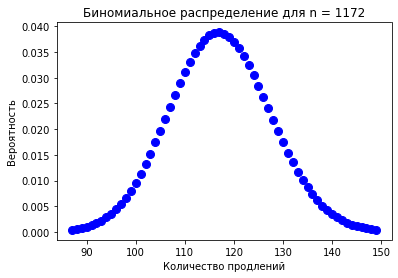

Построенный график показывает биномиальное распределение вероятностей для различного количества использованных промокодов при найденном минимальном количестве отправленных промокодов(n = 1172). 

 Таким образом минимальное количество промокодов для отправки, чтобы удовлетворить заданные условия - 1172 штук

In [45]:
# Заданные параметры
p = 0.1  # Вероятность продления подписки
k = 100  # Желаемое количество продлений
p2 = 0.05  # Желаемая вероятность

# Подбор количества промокодов
for n in range(k, 10000):  # Максимальное значение для n установлено как 10000
    if binom.cdf(k, n, p) <= p2:
        break

print(f"Минимальное количество промокодов для отправки: {n}")

# Построим график распределения
x = np.arange(binom.ppf(0.001, n, p), binom.ppf(0.999, n, p))
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
plt.xlabel('Количество продлений')
plt.ylabel('Вероятность')
plt.title(f'Биномиальное распределение для n = {n}')
plt.show()

display(Markdown(
f"Построенный график показывает биномиальное распределение вероятностей для различного количества использованных \
промокодов при найденном минимальном количестве отправленных промокодов(n = {n}). \n\n \
Таким образом минимальное количество промокодов для отправки, чтобы удовлетворить заданные условия - {n} штук"))

##### Задача 2

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. 

Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

***Краткая формулировка условий:***

В описанной ситуации возможно 2 исхода:
- клиент может открыть push-уведомление
- клиент может не открыть push-уведомление
при этом исходы испытаний независимо повторяющиеся фиксированное количество раз, поэтому перед нами биноминальное распределение.

Уведомления открывают около 40% получивших клиентов
Отдел планирует разослать 1 млн уведомлений 
оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Пусть

p – вероятность успеха (уведомления открывают) = 40%,

k – количество успехов (уведомления открывают) = не более 399,5 тыс. пользователей,

n – количество попыток (разосланных уведомлений) -?

In [46]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# задаём параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

distr = st.norm(mu,sigma)# задайте нормальное распределение

result =distr.cdf(399500) # найдите вероятность
print("Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей равна",round(result*100), "%")

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей равна 15 %


#### Общий вывод

В ходе предобработки данных был рассмотрены файлы с информацией о некоторых пользователях из нескольких городов, а также об их поездках популярного сервиса аренды самокатов GoFast. Требовалось проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

На первом этапе анализа были изменены типы данных в некоторых столбцах; таблицы проверены на пропуски; удалены дублирующиеся строки, так же была произведена проверка на наличие неявных дубликатов. Добавлены необходимые для анализа данные. Следует отметить, что предоставленные данные хорошего качества - в них отсутсвуют пропуски, минимальное количество повторов.

В ходе исследовательского анализа было выявлено, что максимальное количество пользователей сервиса аренды самокатов GoFast находится в Пятигорске(219 человек). Минимальное - в Москве. 

Оказалось, что почти половина пользователей сервиса имеют подписку (46%)

Количество пользователей возрастом от 23 до 26 лет составляют 35 % от общего числа пользователей. 
Так же можно подчеркнуть, что стоит задуматься об ограничении минимального возраста пользователей, так как электросамокат развивает ощутимую скорость и юный водитель может оказаться виновником ДТП. При этом стоит учесть, что в полученных данных подростки до 15 лет составляют всего 2% от общего числа пользователей, то есть не являются основными потребителями услуги аренды.

Чаще всего поездки длятся от 16 до 20 минут, однако, имеются и более длительные -свыше 35мин. Было принято решение, что такая выбивающаяся длительность поездок может быть оправдана, так как пользователи могли действительно совершать такие поездки. Тем не менее, могли возникнуть проблемы с завершением аренды на техническом уровне или проблемы с местом для парковки самоката, на что следует обратить внимание руководству компании.

В среднем пользователи проезжают 3174м, при этом медиана этого показателя у пользователей с подпиской - 3149м, средняя - 3115м, а у пользователей без нее -3115м и 3045м соответственно. Гистограммы проиллюстрировали несколько пиков: есть вероятность, что часть пользователей берет самокаты, чтобы проехать небольшие расстояния. Поэтому соответствующая гистограмма отражает небольшим пиком часть таких пользователей приблизительно на 500м у имеющих подписку пользователей и на 1000м у не имеющих.

Далее было произведено объединение всех таблиц с данными, создание и анализ таблиц с пользователями имеющими подписку и без нее, так же определено среднее время и среднее расстояние поездок пользователей с подпиской и без.

Оказалось, что различия значительны только в количестве поездок имеющих и не имеющих подписку пользователей, продолжительность поездки в обоих случаях отличается не сильно, как и среднее расстояние.

Была рассчитана общая выручка, которая составила за исследуемый период 3733506 руб. При этом выручка от пользователей без подписки - 2103238 руб., а от пользователей с подпиской - 1630268 руб. Следует отметить, что средняя помесячная выручка при этом больше у пользователей с подпиской.

После этого была произведена проверка ряда гипотез. Получены следующие результаты:

- Проверка показала, что среднее время поездки у пользователей с подпиской больше чем у пользователей без подписки.
    
    При этом поездок подписчики на тариф ultra совершают почти в 2 раза меньше, чем пользователи, не имеющие подписки.
    
    Поэтому, решение фирмы иметь подписчиков с более льготной ценой за 1 минуту аренды самоката, но при этом имеющих ежемесячную оплату за подписку является верным.

- Среднее время, которое проезжают пользователи равно 3130м. 
   
   Можно сделать вывод, что за одну поездку пользователи в среднем не превышают оптимальный порог износа самоката в 3130м, что может продлить службу самокатов и сократить издержки на их ремонт и замену.
    
- Помесячная выручка от пользователей с подпиской выше, чем помесячная выручка от пользователей без подписки
  
  Учитывая результаты теста, можно поррекомендовать компании простимулировать пользователей совершить подписку на тариф ultra. Это можно сделать путем введения временной бесплатной подписки или рекламы приложения и условий пользования им для подписчиков. Так же, имея в виду что, подписчики совершают почти в 2 раза меньше поездок, можно ввести бонусы за количество поездок в месяц или учесть данное количество в тарифе, чтобы 
